<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* pandas functions
* regression
* one hot encoding

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import sklearn.datasets as skd

# pandas functions

In [4]:
s1 = sns.load_dataset('titanic')
s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
s1.isnull().sum()[s1.isnull().sum() != 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

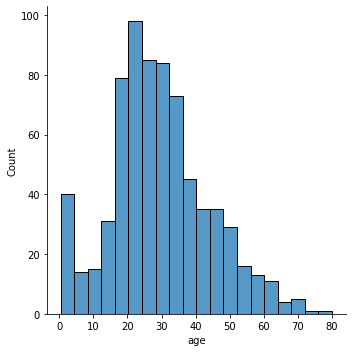

In [6]:
sns.displot(s1['age'])

In [9]:
s1['age'] = s1['age'].fillna(s1['age'].mean()).astype(int)

In [11]:
s1[['embarked', 'embark_town']] = s1[['embarked', 'embark_town']].fillna(s1[['embarked', 'embark_town']].mode().iloc[0,0])

In [14]:
s1.drop('deck', inplace = True, axis = 1)
s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [15]:
s1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [17]:
s1 = s1.assign(age_group = lambda x : np.select([s1['age'] >= 60, s1['age'] >= 40, s1['age'] >= 20, s1['age'] >= 0],
                                           ['older', 'aged', 'young', 'child']
                                           ))
s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,young
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,young
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,young
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,young


In [26]:
cnt_fare = s1.groupby(['age_group', 'sex', 'pclass'])['fare'].mean().reset_index()
cnt_fare['pclass'] = cnt_fare['pclass'].astype('category')
cnt_fare.head()


,age_group,sex,pclass,fare
0,aged,female,1,98.297172
1,aged,female,2,22.093750
2,aged,female,3,23.917133
3,aged,male,1,53.134403
4,aged,male,2,17.830882


In [21]:
import plotnine as gg 
from plotnine import ggplot, aes 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


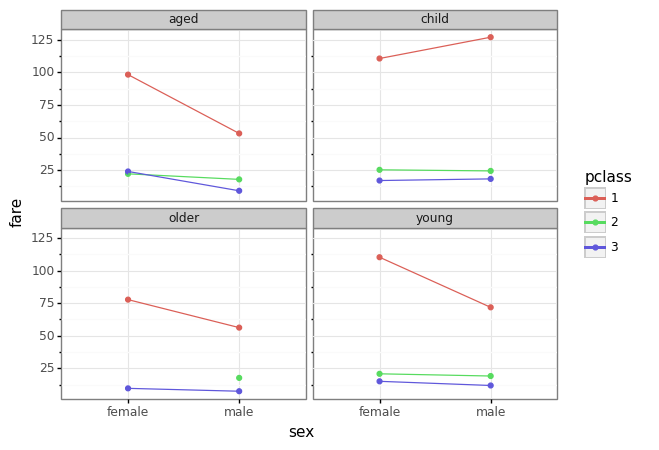

<ggplot: (8753550644189)>

In [27]:
(
    ggplot(cnt_fare, aes('sex', 'fare', color = 'pclass', group = 'pclass')) +
    gg.geom_point() +
    gg.geom_line() +
    gg.facet_wrap('~age_group') +
    gg.theme_bw()
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


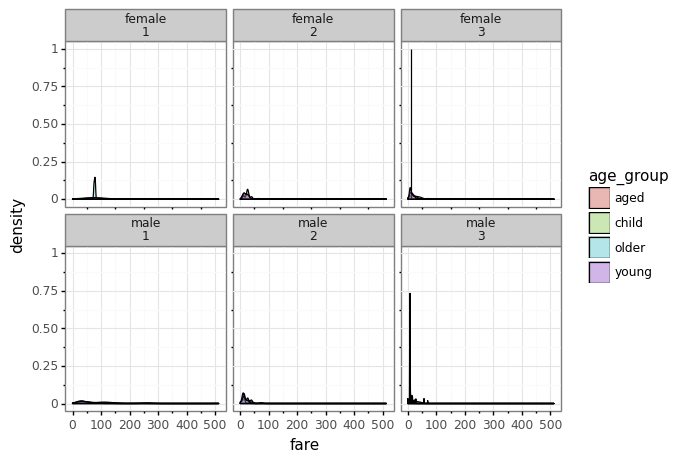

<ggplot: (8753550642673)>

In [29]:
(
    ggplot(s1, aes('fare', fill = 'age_group')) +
    gg.geom_density(alpha = .4) +
    gg.facet_wrap('~sex+pclass') +
    gg.theme_bw()
)

In [45]:
cnt_q = s1.groupby(['sex', 'pclass'])['fare'].quantile([.25,.5,.75,.95,.99]).reset_index()
cnt_q.rename(columns = {'level_2':'q'}, inplace = True)
cnt_q['q'] = cnt_q['q'].astype(str)
cnt_q.head()

,sex,pclass,q,fare
0,female,1,0.25,57.244800
1,female,1,0.5,82.664550
2,female,1,0.75,134.500000
3,female,1,0.95,252.719770
4,female,1,0.99,280.453044


In [46]:
cnt_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     30 non-null     object 
 1   pclass  30 non-null     int64  
 2   q       30 non-null     object 
 3   fare    30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


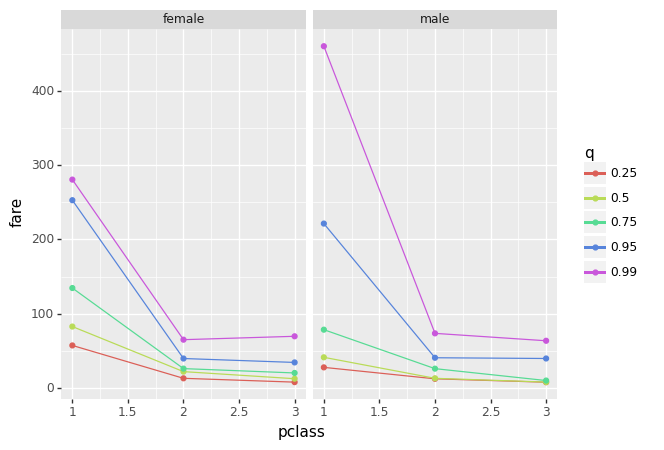

<ggplot: (8753549722169)>

In [47]:
(
    ggplot(cnt_q, aes('pclass', 'fare', color = 'q', group = 'q')) +
    gg.geom_line() + gg.geom_point() +
    gg.facet_wrap('~sex')
)

In [49]:
cnt_fare.head()

,age_group,sex,pclass,fare
0,aged,female,1,98.297172
1,aged,female,2,22.093750
2,aged,female,3,23.917133
3,aged,male,1,53.134403
4,aged,male,2,17.830882


# regression

In [57]:
raw1 = skd.load_boston()
raw2 = skd.load_diabetes()
print([a for a,b in raw1.items()])
print([a for a,b in raw2.items()])

['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']
['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [58]:
x1 = pd.DataFrame(raw1['data'], columns = raw1['feature_names'])
y1 = raw1['target']

x2 = pd.DataFrame(raw2['data'], columns = raw2['feature_names'])
y2 = raw2['target']

In [59]:
x1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
x_tr, x_te, y_tr, y_te = train_test_split(x1, y1, train_size = .7)

In [62]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

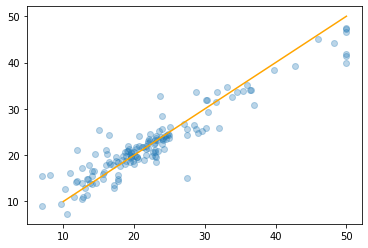

In [64]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([10, 50], [10, 50], color = 'orange')

# one hot encoding

In [65]:
s1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,young
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,young
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,young
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True,young
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True,child
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False,young
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,young


In [66]:
pd.get_dummies(s1, columns = ['age_group'], prefix = 'age').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_aged,age_child,age_older,age_young
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,0,0,0,1
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0,1
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,0,1
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,0,1
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,0,0,0,1


In [68]:
col_names = s1.age_group.unique()
col_names

array(['young', 'aged', 'child', 'older'], dtype=object)

In [69]:
for c in col_names :
  s1[f'age_{c}'] = s1['age_group'] == c
s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group,age_young,age_aged,age_child,age_older
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,young,True,False,False,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,young,True,False,False,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young,True,False,False,False
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,young,True,False,False,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,young,True,False,False,False
